In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# Copyright 2021 The MITRE Corporation. All Rights Reserved.

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from qiskit.compiler import transpile
from time import perf_counter
from qiskit.visualization import plot_histogram

# Initialization
qubits = QuantumRegister(3)
measurement = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, measurement)

# Build the circuit
start = perf_counter()
circuit.h(qubits[0])
circuit.h(qubits[1])
circuit.ccx(qubits[0], qubits[1], qubits[2])
circuit.measure(qubits, measurement)
end = perf_counter()
print(f"Circuit construction took {(end - start)} sec.")
print(circuit)

# Get the number of qubits needed to run the circuit
active_qubits = {}
for op in circuit.data:
    if op[0].name != "barrier" and op[0].name != "snapshot":
        for qubit in op[1]:
                active_qubits[qubit.index] = True
print(f"Width: {len(active_qubits)} qubits")

# Get some other metrics
print(f"Depth: {circuit.depth()}")
print(f"Gate counts: {circuit.count_ops()}")

# Transpile the circuit to something that can run on the Santiago machine
provider = IBMQ.load_account()
machine = "ibmq_quito"
backend = provider.get_backend(machine)

print(f"Transpiling for {machine}...")
start = perf_counter()
circuit = transpile(circuit, backend=backend, optimization_level=1)
end = perf_counter()
print(f"Compiling and optimizing took {(end - start)} sec.")
print(circuit)

# Get the number of qubits needed to run the circuit
active_qubits = {}
for op in circuit.data:
    if op[0].name != "barrier" and op[0].name != "snapshot":
        for qubit in op[1]:
                active_qubits[qubit.index] = True
print(f"Width: {len(active_qubits)} qubits")

# Get some other metrics
print(f"Depth: {circuit.depth()}")
print(f"Gate counts: {circuit.count_ops()}")

# Simulate a run on Santiago, using its real gate information to model the output with real errors
santiago_sim = AerSimulator.from_backend(backend)
result = santiago_sim.run(circuit).result()
counts = result.get_counts(circuit)
for(measured_state, count) in counts.items():
    big_endian_state = measured_state[::-1]
    print(f"Measured {big_endian_state} {count} times.")

from qiskit.providers.fake_provider import FakeMontreal
montreal_backend = FakeMontreal()

# Feel free to put other circuit experiments using this backend here and play around!

Circuit construction took 0.0003422089994273847 sec.
       ┌───┐     ┌─┐      
q19_0: ┤ H ├──■──┤M├──────
       ├───┤  │  └╥┘┌─┐   
q19_1: ┤ H ├──■───╫─┤M├───
       └───┘┌─┴─┐ ║ └╥┘┌─┐
q19_2: ─────┤ X ├─╫──╫─┤M├
            └───┘ ║  ║ └╥┘
 c2: 3/═══════════╩══╩══╩═
                  0  1  2 
Width: 3 qubits
Depth: 3
Gate counts: OrderedDict([('measure', 3), ('h', 2), ('ccx', 1)])


/tmp/ipykernel_641/1171539131.py:29: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  active_qubits[qubit.index] = True
ibmqfactory.load_account:WARNING:2022-08-03 19:19:13,599: Credentials are already in use. The existing account in the session will be replaced.


Transpiling for ibmq_quito...
Compiling and optimizing took 1.3544651400006842 sec.
global phase: 9π/8
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐     ┌───┐     »
    q19_2 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■──»
               ├─────────┤├────┤├─────────┤└─┬─┘└──────────┘┌─┴─┐└─┬─┘┌─┴─┐»
    q19_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──────────────┤ X ├──■──┤ X ├»
               ├─────────┤├────┤├─────────┤                 └───┘     └───┘»
    q19_0 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├────────────────────────────────»
               └─────────┘└────┘└─────────┘                                »
ancilla_0 -> 3 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_1 -> 4 ────────────────────────────────────────────────────────────»
                                                                           »
         c2: 3/═══════════════════════════════════

/tmp/ipykernel_641/1171539131.py:53: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  active_qubits[qubit.index] = True


                                                                         »
q75_0: ──────────────────────────────────────────────────────────────────»
          ┌───┐    ┌──────────┐                                          »
q75_1: ───┤ H ├────┤ Rz(3π/2) ├──────────────────────────────────────────»
          ├───┤    ├──────────┤                                          »
q75_2: ───┤ H ├────┤ Rz(3π/4) ├────■─────────■──────────■─────────■──────»
       ┌──┴───┴───┐└──────────┘┌───┴───┐┌────┴─────┐┌───┴───┐┌────┴─────┐»
q75_3: ┤ Ry(-π/2) ├────────────┤ Rz(0) ├┤ Rx(-π/8) ├┤ Rz(0) ├┤ Rx(-π/8) ├»
       └──────────┘            └───────┘└──────────┘└───────┘└──────────┘»
 c4: 4/══════════════════════════════════════════════════════════════════»
                                                                         »
«                                                                      »
«q75_0: ───────────────────────────────────────────────────────────────»
«                            

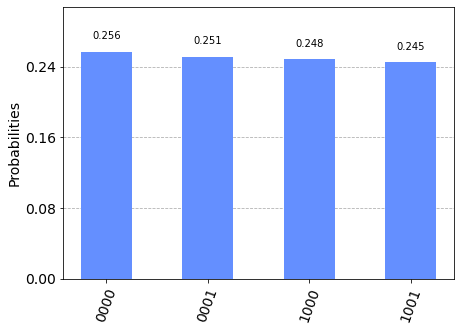

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
from qiskit.circuit.library.standard_gates import SGate, SdgGate
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import Aer


#generalized form of allowable: Matrix
#theta = 0 to 2*pi
#matrix = np.array([1+(np.cos(theta))**2, -np.sin(2*theta)/2],[-np.sin(2*theta)/2, 1+(np.sin(theta))**2])

"""#example 1
theta = (3*np.pi)/2

matrix = np.array([1+(np.cos(theta))**2, -np.sin(2*theta)/2],[-np.sin(2*theta)/2, 1+(np.sin(theta))**2])
sol = np.array([1,0])"""

#example 2
matrix = np.array([[1.5, 0.5],[0.5, 1.5]])
sol = np.array([1,-1])

k = np.sqrt((sol[0]**2)+(sol[1]**2)) #scaling factor so solution has mag. 1
sol = sol*(1/k)


qubits = QuantumRegister(4)
measurement = ClassicalRegister(4)
circuit = QuantumCircuit(qubits,measurement)

#t = number of variables + log(2+1/(2*error)) //some magic number
t = np.pi/2 #changed to pi/2

#r = number that increases precision of solution as it gets higher, but requires more computation
r = 4

#number of shots
s=10000

#last index of qubits
last_index = len(qubits)-1

#load sol
circuit.ry(2*np.arctan2(sol[1],sol[0]),qubits[-1])


#phase estimation

#set superposition
circuit.h(qubits[1])
circuit.h(qubits[2])

#trotterization
beta = matrix[0][1]
gamma = (matrix[0][0]-matrix[1][1])/2.0
alpha = (matrix[0][0]+matrix[1][1])/2.0 #added alpha

for i in (range(1,last_index)):
    circuit.rz(t*alpha*2**(i-1),  qubits[last_index-i])
    for x in range(r):
        circuit.crz(((-2*t*gamma*2**(i-1))/r),qubits[last_index-i],qubits[-1])
        circuit.crx(((-2*t*beta*2**(i-1))/r),qubits[last_index-i],qubits[-1])


circuit.swap(qubits[1],qubits[2])
circuit.h(qubits[2])

csdg = SdgGate().control(1) #create a controlled adjoint S gate
circuit.append(csdg,[1,2])


circuit.h(qubits[1])
circuit.swap(qubits[1],qubits[2])

# #controlled rotation
rot_number = 2

circuit.cry((2*np.pi)/(2**rot_number),qubits[1],qubits[0])
circuit.cry((np.pi)/(2**rot_number),qubits[2],qubits[0])


# #inverse phase estimation

circuit.swap(qubits[1],qubits[2])
circuit.h(qubits[1])

cs = SGate().control(1) #create a controlled S gate
circuit.append(cs,[1,2])

circuit.h(qubits[2])
circuit.swap(qubits[1],qubits[2])

# #reverse trotterization
for i in reversed(range(1,last_index)):
    circuit.rz(-t*alpha*2**(i-1),  qubits[last_index-i]) #added by Nikita
    for x in range(r):
        circuit.crx(((2*t*beta*2**(i-1))/r),qubits[last_index-i],qubits[-1])
        circuit.crz(((2*t*gamma*2**(i-1))/r),qubits[last_index-i],qubits[-1])
        
        
# #undo superposition
circuit.h(qubits[1])
circuit.h(qubits[2])

    
circuit.measure(qubits,measurement)

print(circuit)

simulator = Aer.get_backend('aer_simulator')
simulation = execute(circuit, simulator, shots=s)
result = simulation.result()

counts = result.get_counts(circuit)

#Only count instances when last qubit is 1

#classical post-processing
total = 0
x_count = 0
y_count = 0

print("COUNTS: "+str(counts))

for measure in counts:
    if (measure[3]=='1'):
       # print("MEASURE: "+measure)
        total+=counts[measure]

        if (measure[0]=='0'):
            x_count+=counts[measure]
        else:
            y_count+=counts[measure]

x_value = np.sqrt(x_count/total)*k
y_value = np.sqrt(y_count/total)*k
ratio = x_value/y_value

print("RATIO OF SOLUTIONS (X/Y): "+str(ratio))

print(f"Depth: {circuit.depth()}")

plot_histogram(counts)